In [1]:
import os, sys

sys.path.append('/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import config
config.conf_matplolib()
import nrcatalogtools

/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools/nrcatalogtools/lvc.py:2: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


No version information file '.version' found


In [3]:
from nrcatalogtools import SXSCatalog

In [4]:
import sxs
# View SXS cache
sxs.sxs_directory("cache")

PosixPath('/mnt/pfs/vaishak.p/sxs')

In [5]:
sc = SXSCatalog.load(download=True)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer


In [6]:
# Simulation name
sim_name = 'SXS:BBH:0030'

# Parameters
M = 40
D = 100
inc = 0
coa_phase = 0
delta_t = 1./2048

In [7]:
mwf = sc.get(sim_name)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0030v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/90121332 [00:00<?, ?it/s]

/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gw/lib/python3.11/site-packages/sxs/waveforms/format_handlers/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


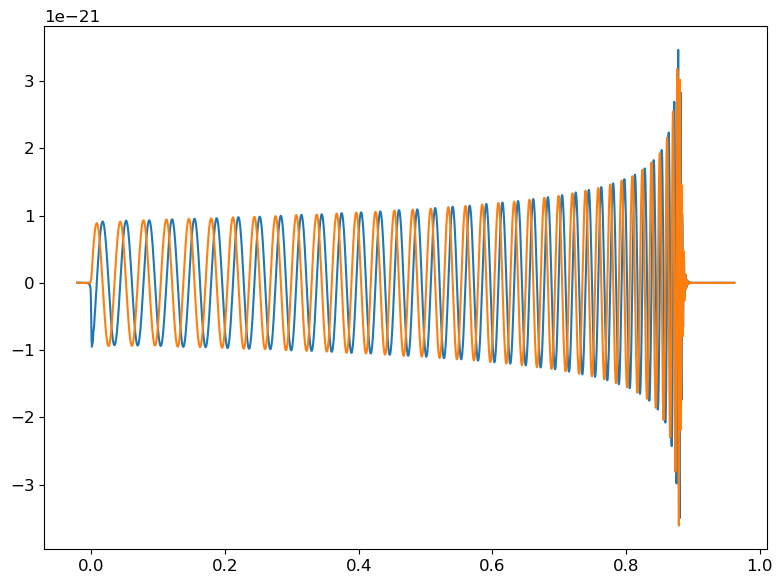

In [8]:
hpc = mwf.get_td_waveform(total_mass=M, distance=D, inclination=inc,
                    coa_phase=coa_phase, delta_t=delta_t
                    )
hpc_pycbc = hpc # mwf.to_pycbc(hpc)
hp, hc = hpc_pycbc.real(), hpc_pycbc.imag()

plt.plot(hp.sample_times, hp)
plt.plot(hc.sample_times, hc)
plt.grid()
plt.show()

In [34]:
np.array(hp.sample_times)[-1] - np.array(hp.sample_times)[0]

1.97412109375

In [35]:
hp_fs = hp.to_frequencyseries()
hc_fs = hc.to_frequencyseries()

In [36]:
faxis = hp_fs.sample_frequencies

In [37]:
np.array(hp_fs)

array([ 1.89241081e-24+0.00000000e+00j, -2.38704400e-25+1.67438943e-25j,
        5.18911984e-26+2.03379469e-25j, ...,
        4.80704653e-28-2.56119021e-28j,  5.27458788e-28-1.31538418e-28j,
        5.43443108e-28+0.00000000e+00j])

In [38]:
np.array(hp_fs)

array([ 1.89241081e-24+0.00000000e+00j, -2.38704400e-25+1.67438943e-25j,
        5.18911984e-26+2.03379469e-25j, ...,
        4.80704653e-28-2.56119021e-28j,  5.27458788e-28-1.31538418e-28j,
        5.43443108e-28+0.00000000e+00j])

In [39]:
faxis

In [40]:
np.savetxt("prepared_waveform.txt", np.array([hp.sample_times, np.array(hp), np.array(hc)]).T)

In [41]:
np.savetxt("prepared_waveform_fseries2.txt", np.array([np.array(faxis).real, np.array(hp_fs).real, np.array(hc_fs).real]).T)